# Basic Analyses & Data Exploration

In order to obtain a basic overview of the data, simple queries are made in a basic analysis, which may provide information about the data package.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
from collections import Counter
from collections import defaultdict

In [2]:
df = pd.read_csv('p1p857.csv', index_col=0)
df.head()

,page_id,page_title,revision_id,timestamp,comment,contributor_id,contributor_name,bytes,revtext,dates,times,revbytes,revperc
0,10,AccessibleComputing,233192,2001-01-21 02:12:21,*,99,RoseParks,124,This subject covers* AssistiveTechnology* Acce...,2001-01-21,02:12:21,2848,4.353933
1,10,AccessibleComputing,862220,2002-02-25 15:43:11,Automated conversion,1226483,Conversion script,35,#REDIRECT [[Accessible Computing]],2002-02-25,15:43:11,2848,1.228933
2,10,AccessibleComputing,15898945,2003-04-25 22:18:38,Fixing redirect,7543,Ams80,34,#REDIRECT [[Accessible_computing]],2003-04-25,22:18:38,2848,1.193820
3,10,AccessibleComputing,56681914,2006-06-03 16:55:41,fix double redirect,516514,Nzd,36,#REDIRECT [[Computer accessibility]],2006-06-03,16:55:41,2848,1.264045
4,10,AccessibleComputing,74466685,2006-09-08 04:16:04,cat rd,750223,Rory096,57,#REDIRECT [[Computer accessibility]] {{R from ...,2006-09-08,04:16:04,2848,2.001404


# Queries on a per article basis

### How many revisions were made?

This query counts the number of unique revision IDs per article and also gives the average size of the revisions in bytes per article.

In [3]:
revcount = df.groupby(['page_title']).agg({'revision_id' : 'count', 'bytes' : 'mean'})
revcount = revcount.rename({'revision_id' : 'revcount', 'bytes' : 'meansize'}, axis = "columns").reset_index()
revcount = revcount.sort_values(['revcount'], ascending=False)
revcount.head()

,page_title,revcount,meansize
146,Anarchism,19961,84662.829167
27,Abraham Lincoln,17613,108672.676375
96,Albert Einstein,17476,86462.335031
84,Albania,16271,94737.645873
133,American Revolutionary War,15881,134133.046597


Text(0.5, 1.0, 'Top 5 of most revisioned Articles')

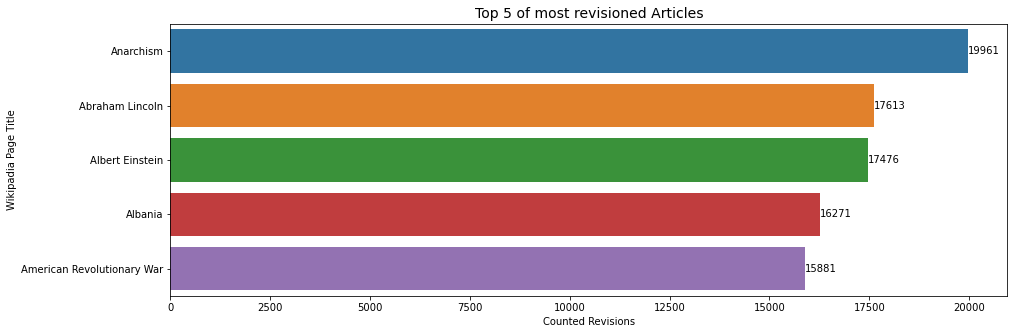

In [4]:
plt.figure(figsize=(15,5))
plot1 = sns.barplot(x = 'revcount', y = 'page_title', data = revcount[:5])
plt.xlabel("Counted Revisions")
plt.ylabel("Wikipadia Page Title")
plt.bar_label(plot1.containers[0])
plt.title("Top 5 of most revisioned Articles", size=14)

**How many revisions were made per date?**

The query groups the output by title and date and shows how many revidents contributed that day with the sum of how many bytes.

In [5]:
revdate = df.groupby(['page_title', 'dates']).agg({'revision_id' : 'count', 'bytes' : 'sum'})
revdate = revdate.rename({'revision_id' : 'revcount', 'bytes' : 'bytes_sum'}, axis = "columns")
revdate.sort_values(['page_title', 'dates'], ascending = True)

revcount  bytes_sum
page_title                                     dates                          
A                                              2001-05-17         1       6784
                                               2001-06-26         1        871
                                               2001-07-05         2      14748
                                               2002-02-02         1       7528
                                               2002-02-25         1       7565
...                                                             ...        ...
Wikipedia:Adding Wikipedia articles to Nupedia 2002-12-20         2      12928
                                               2003-01-10         1       6667
                                               2003-02-07         1       6596
                                               2003-03-12         1       6690
                                               2003-03-17         1         45

[179720 rows x 2 columns]

The following cells show the first and last revisions in the dataset

In [6]:
dfrevdate = revdate.reset_index().sort_values(['dates'], ascending = True)
dfrevdate.head()

,page_title,dates,revcount,bytes_sum
29626,AfghanistanCommunications,2001-01-21,1,1159
29662,AfghanistanTransportations,2001-01-21,1,927
29657,AfghanistanTransnationalIssues,2001-01-21,1,523
29649,AfghanistanPeople,2001-01-21,1,1601
29643,AfghanistanMilitary,2001-01-21,1,718


In [7]:
#dfrevdate = dfrevdate[3000:3100].reset_index()
dfrevdate.tail()

,page_title,dates,revcount,bytes_sum
5549,ASCII,2022-02-01,2,215629
110815,Angola,2022-02-01,2,304221
135804,Arabic,2022-02-01,5,954071
170495,Ayn Rand,2022-02-01,2,184152
35101,Aikido,2022-02-01,1,56891


### How are revisions distributed over time?

The following plot shows all revisions for all articles contained in the dataset as they are distributed over time. The lables on the x-axis are set every 6000 revisions to provide a better understanding on how many revisions were made in a given time period, as the amount of overlap between the data points would make this hard otherwise. As a result of this approach, 

If more than 130 revisions were done on a single article on a single date, the datapoint is labeled with date and article name.



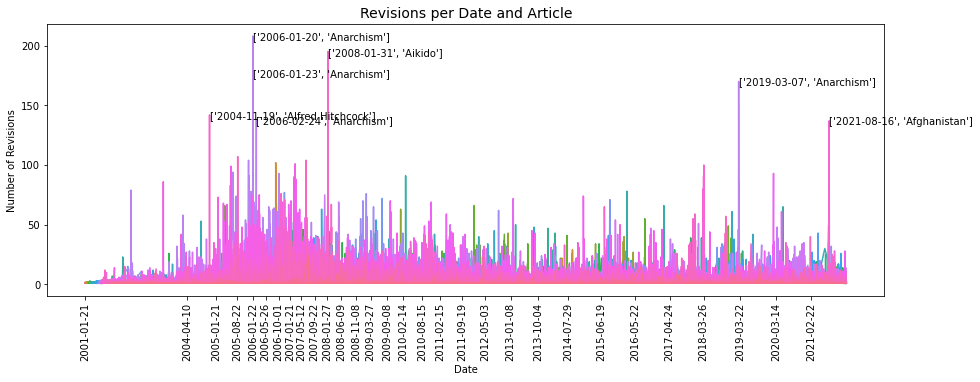

In [8]:
plt.figure(figsize=(15,5))
plot2 = sns.lineplot(x = 'dates', y = 'revcount', data = dfrevdate, hue = 'page_title', legend = None)
plt.xlabel("Date")
plt.ylabel("Number of Revisions")
plt.xticks(rotation=90)
plt.xticks(dfrevdate['dates'].iloc[::6000])
plt.title("Revisions per Date and Article", size=14)
for x, y, z in zip(dfrevdate['dates'], dfrevdate['revcount'], dfrevdate['page_title']):
    if y > 130:
        plt.text(x = x, y = y-3, s = [x, z])
plt.show()

**Revisions per date cumulated**

Step 1: generate new column "revdates": indicates the number of revisions on this day.

In [9]:
df['revdates'] = df.groupby(by='dates')['dates'].transform('count')
dfrevdates_unique = df[['dates', 'revdates']].sort_values('dates')
dfrevdates_unique = dfrevdates_unique.drop_duplicates('dates')

The following plot shows the sum of all revisions per date as distributed over time.

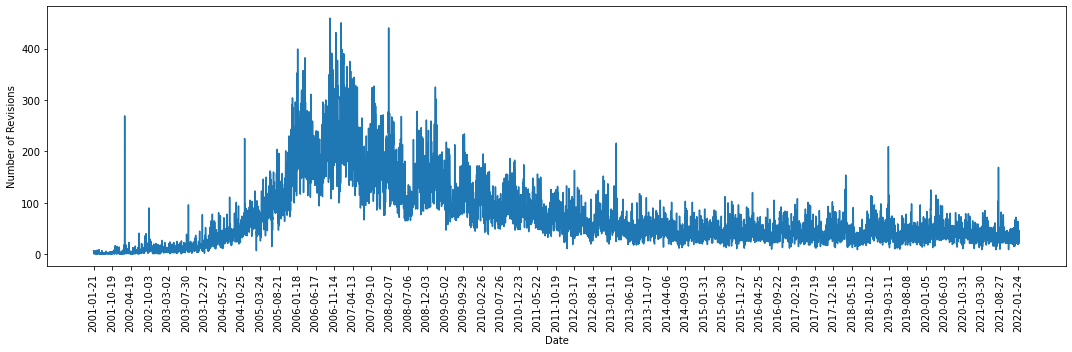

In [10]:
plt.figure(figsize=(15,5))
plt.plot(dfrevdates_unique['dates'], dfrevdates_unique['revdates'])
plt.xlabel("Date")
plt.ylabel("Number of Revisions")
plt.xticks(rotation=90)
plt.tight_layout()
plt.xticks(dfrevdates_unique['dates'].iloc[::150])
plt.show()

Step 2: Query generates the cumulative total of daily revision counts based on the article and date

In [11]:
revcums = df.groupby(['page_title', 'dates']).count().groupby(level=0).cumsum().reset_index()
revcums = revcums[['page_title', 'dates', 'revdates']]

The following cell checks if the cumsum is accurate by calculating the sum of the last revcount for each article and comparing this value with the total number of revisions found in the raw data

In [13]:
revcums

,page_title,dates,revdates
0,A,2001-05-17,1
1,A,2001-06-26,2
2,A,2001-07-05,4
3,A,2002-02-02,5
4,A,2002-02-25,6
...,...,...,...
179715,Wikipedia:Adding Wikipedia articles to Nupedia,2002-12-20,6
179716,Wikipedia:Adding Wikipedia articles to Nupedia,2003-01-10,7
179717,Wikipedia:Adding Wikipedia articles to Nupedia,2003-02-07,8
179718,Wikipedia:Adding Wikipedia articles to Nupedia,2003-03-12,9


In [14]:
revision_cnt = 0
for page in revcums['page_title'].unique():
	revision_cnt += revcums[revcums['page_title']==page]['revdates'].iloc[-1]

In [15]:
revision_cnt == len(df)

True

Going forward the article for 'Anarchism' will be used as an example

In [16]:
filter = ((revcums['page_title'].str.contains('anarchism', case = False)))
dfanarchism = revcums[filter]
dfanarchism.head()

,page_title,dates,revdates
96584,Anarchism,2001-10-11,1
96585,Anarchism,2001-11-28,2
96586,Anarchism,2001-12-02,4
96587,Anarchism,2002-02-25,6
96588,Anarchism,2002-02-27,8


In [17]:
dfanarchism

,page_title,dates,revdates
96584,Anarchism,2001-10-11,1
96585,Anarchism,2001-11-28,2
96586,Anarchism,2001-12-02,4
96587,Anarchism,2002-02-25,6
96588,Anarchism,2002-02-27,8
...,...,...,...
99795,Anarchism,2022-01-22,19950
99796,Anarchism,2022-01-24,19951
99797,Anarchism,2022-01-25,19957
99798,Anarchism,2022-01-26,19958


Text(0.5, 1.0, 'Cum. Revisions per Date for Anarchism')

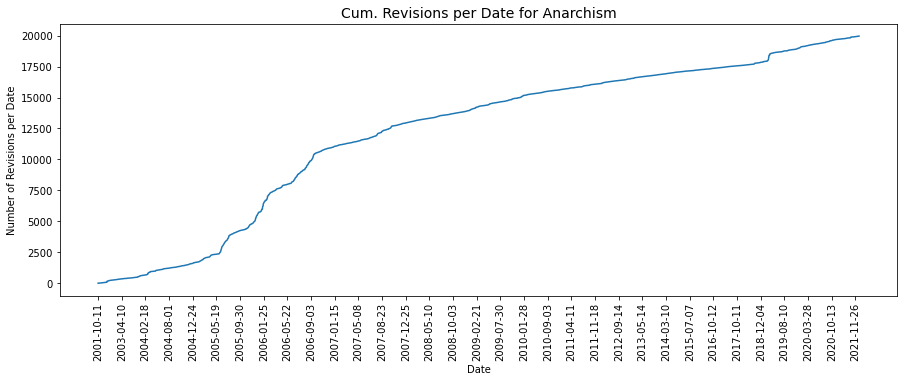

In [18]:
plt.figure(figsize=(15,5))
sns.lineplot(x = 'dates', y = 'revdates', data = dfanarchism, legend = None)
plt.xlabel("Date")
plt.ylabel("Number of Revisions per Date")
plt.xticks(rotation=90)
plt.xticks(dfanarchism['dates'].iloc[::100])
plt.title("Cum. Revisions per Date for Anarchism", size=14)

**How many revisions were handled by each revisor?**

Query groups by article, username, and date, counts revisions on that day, and outputs the sum of all revision sizes.

In [19]:
revuser = df.groupby(['page_title', 'contributor_name', 'contributor_id', 'dates']).agg({'revdates' : 'count', 'bytes' : 'sum'})
revuser.sort_values(['page_title', 'revdates'], ascending = False)

revdates  \
page_title                                     contributor_name  contributor_id dates                  
Wikipedia:Adding Wikipedia articles to Nupedia anon              211.26.134.83  2002-12-20         2   
                                               Conversion script 1226483        2002-02-25         1   
                                               David Martland    5457           2002-11-18         1   
                                               Eclecticology     372            2002-05-19         1   
                                               Larry_Sanger      0              2001-03-28         1   
...                                                                                              ...   
A                                              Žiedas            8859014        2010-01-05         1   
                                               Саша Стефановић   205156         2005-11-22         1   
                                               Учхљёная          30241636       2018-02-19         1   
                                                                                2018-03-13         1   
                                               とある白い猫            184109         2005-11-04         1   

                                                                                            bytes  
page_title                                     contributor_name  contributor_id dates              
Wikipedia:Adding Wikipedia articles to Nupedia anon              211.26.134.83  2002-12-20  12928  
                                               Conversion script 1226483        2002-02-25   5059  
                                               David Martland    5457           2002-11-18   6457  
                                               Eclecticology     372            2002-05-19   5006  
                                               Larry_Sanger      0              2001-03-28   4637  
...                                                                                           ...  
A                                              Žiedas            8859014        2010-01-05   8649  
                                               Саша Стефановић   205156         2005-11-22   9942  
                                               Учхљёная          30241636       2018-02-19  22639  
                                                                                2018-03-13  21315  
                                               とある白い猫            184109         2005-11-04   9939  

[369149 rows x 2 columns]

The output shows the days with the biggest sums of revisions sizes from a single user

In [20]:
dfrevuser = revuser.reset_index().sort_values(['bytes'], ascending = False)
dfrevuser.head()

,page_title,contributor_name,contributor_id,dates,revdates,bytes
206084,Anarchism,Cinadon36,29281028,2019-03-07,165,24645399
206085,Anarchism,Cinadon36,29281028,2019-03-08,94,11953306
65055,Agriculture,Chiswick Chap,2666701,2018-03-26,89,10831474
183870,American Revolutionary War,Gwillhickers,11642524,2020-03-21,43,10600586
364220,Talk:Afghanistan/Archive 6,Beh-nam,1205085,2007-01-13,25,10375908


The following graph shows the top 5 biggest revisions with the resprctive contributor. As 'Cinadon36' has both the largest and second largest revisions, the grey bar represents the difference between those those two.

Text(0.5, 1.0, 'Top 5 of biggest Revisions with Contributor')

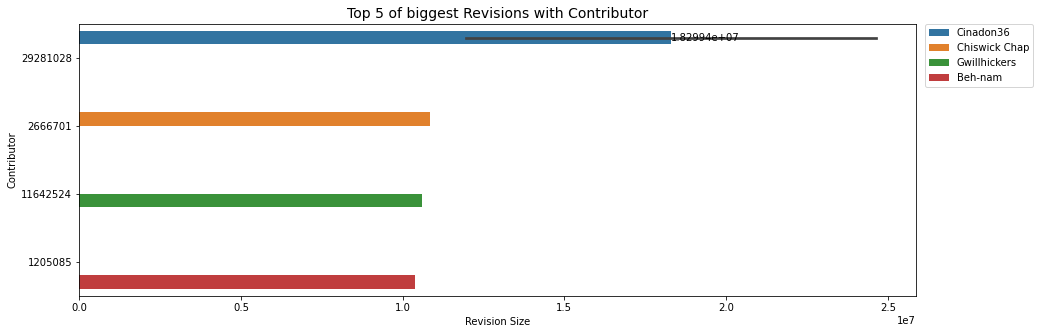

In [21]:
plt.figure(figsize=(15,5))
data = dfrevuser[:5]
revuserplot = sns.barplot(x = 'bytes', y = 'contributor_id', hue = 'contributor_name', data = data)
plt.xlabel("Revision Size")
plt.ylabel("Contributor")
plt.bar_label(revuserplot.containers[0])
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.title("Top 5 of biggest Revisions with Contributor", size=14)

**Which users change the most in their revisions (compared to the average)?**

Query of changed bytes per article per user and comparison by output of the sum of all revision bytes of the article.

In [22]:
revuserbytes = df.groupby(['page_title', 'contributor_name', 'bytes']).agg({'revdates' : 'count', 'revbytes' : 'sum'})
revuserbytes.sort_values(['page_title', 'bytes'], ascending = False).reset_index().head()

,page_title,contributor_name,bytes,revdates,revbytes
0,Wikipedia:Adding Wikipedia articles to Nupedia,Stephen Gilbert,6690,1,54085
1,Wikipedia:Adding Wikipedia articles to Nupedia,MartinHarper,6667,1,54085
2,Wikipedia:Adding Wikipedia articles to Nupedia,MartinHarper,6596,1,54085
3,Wikipedia:Adding Wikipedia articles to Nupedia,anon,6471,1,54085
4,Wikipedia:Adding Wikipedia articles to Nupedia,David Martland,6457,1,54085


**How large are the revisions in relation?**

Query sorted by article, revisor and percentage of revisions

In [23]:
revsize = df.groupby(['page_title', 'contributor_name', 'revperc']).agg({'revdates' : 'count', 'revbytes' : 'sum'})
revsize = revsize.sort_values(['page_title', 'revperc', 'contributor_name'], ascending = False).reset_index()
revsize.head()

,page_title,contributor_name,revperc,revdates,revbytes
0,Wikipedia:Adding Wikipedia articles to Nupedia,Stephen Gilbert,12.369419,1,54085
1,Wikipedia:Adding Wikipedia articles to Nupedia,MartinHarper,12.326893,1,54085
2,Wikipedia:Adding Wikipedia articles to Nupedia,MartinHarper,12.195618,1,54085
3,Wikipedia:Adding Wikipedia articles to Nupedia,anon,11.964500,1,54085
4,Wikipedia:Adding Wikipedia articles to Nupedia,anon,11.938615,1,54085


In [24]:
filter = (revsize['page_title'].str.contains('Anarchism'))
anarchrevsize = revsize[filter].sort_values('revperc', ascending=False)
anarchrevsize

,page_title,contributor_name,revperc,revdates,revbytes
202469,Anarchism,Eduen,1.823126e-02,2,3379909466
202470,Anarchism,Citation bot,1.220512e-02,1,1689954733
202471,Anarchism,WisdomTooth3,1.220133e-02,1,1689954733
202472,Anarchism,SpeedRunnerOfPersia,1.195233e-02,1,1689954733
202473,Anarchism,SpeedRunnerOfPersia,1.195068e-02,1,1689954733
...,...,...,...,...,...
220436,Anarchism,anon,2.366927e-07,1,1689954733
220437,Anarchism,anon,5.917318e-08,1,1689954733
220438,Anarchism,anon,0.000000e+00,6,10139728398
220439,Anarchism,McNick,0.000000e+00,1,1689954733


In [25]:
filter = (anarchrevsize['revperc'] > 0.01)
anarchrevsize1 = anarchrevsize[filter]
anarchrevsize1.head()

,page_title,contributor_name,revperc,revdates,revbytes
202469,Anarchism,Eduen,0.018231,2,3379909466
202470,Anarchism,Citation bot,0.012205,1,1689954733
202471,Anarchism,WisdomTooth3,0.012201,1,1689954733
202472,Anarchism,SpeedRunnerOfPersia,0.011952,1,1689954733
202473,Anarchism,SpeedRunnerOfPersia,0.011951,1,1689954733


In [26]:
data = go.Bar(x=anarchrevsize1.contributor_name, y=anarchrevsize1.revperc, text=anarchrevsize1.page_title)
fig = go.Figure(data=data, layout_title_text="Contributors for article 'Anarchism' in percent of contributions")
fig.show()

**What are the maximum values for revisions?**

Query by date and sort by article and sort by revision size in descending order

In [27]:
revspikes = df.groupby(['page_title', 'dates']).agg({'bytes' : 'max'})
revspikes = revspikes.sort_values(['page_title', 'bytes', 'dates'], ascending = False).reset_index()
revspikes.head()

,page_title,dates,bytes
0,Wikipedia:Adding Wikipedia articles to Nupedia,2003-03-12,6690
1,Wikipedia:Adding Wikipedia articles to Nupedia,2003-01-10,6667
2,Wikipedia:Adding Wikipedia articles to Nupedia,2003-02-07,6596
3,Wikipedia:Adding Wikipedia articles to Nupedia,2002-12-20,6471
4,Wikipedia:Adding Wikipedia articles to Nupedia,2002-11-18,6457


In [28]:
filter = (revspikes['page_title'].str.contains('Anarchism'))
anarchrevspikes = revspikes[filter].sort_values('bytes', ascending=False)
anarchrevspikes

,page_title,dates,bytes
79920,Anarchism,2012-11-16,308100
79921,Anarchism,2018-12-31,206261
79922,Anarchism,2019-01-06,201989
79923,Anarchism,2019-03-06,200208
79924,Anarchism,2018-12-30,199632
...,...,...,...
83131,Anarchism,2003-05-05,4493
83132,Anarchism,2003-05-04,4489
83133,Anarchism,2003-05-06,4487
83134,Anarchism,2003-05-03,4481


In [29]:
data = go.Bar(x=anarchrevspikes.dates, y=anarchrevspikes.bytes, text=anarchrevspikes.page_title)
fig = go.Figure(data=data, layout_title_text="largest Revisions for article Anarchism in bytes")
fig.show()

**Do users who revise more often also make larger revisions?**

Step 1: Generate the column "nrevs" which counts the number of revisions per user

In [30]:
df['nrevs'] = df.groupby(by='contributor_id')['contributor_id'].transform('count')
df.head()

,page_id,page_title,revision_id,timestamp,comment,contributor_id,contributor_name,bytes,revtext,dates,times,revbytes,revperc,revdates,nrevs
0,10,AccessibleComputing,233192,2001-01-21 02:12:21,*,99,RoseParks,124,This subject covers* AssistiveTechnology* Acce...,2001-01-21,02:12:21,2848,4.353933,7,8
1,10,AccessibleComputing,862220,2002-02-25 15:43:11,Automated conversion,1226483,Conversion script,35,#REDIRECT [[Accessible Computing]],2002-02-25,15:43:11,2848,1.228933,269,267
2,10,AccessibleComputing,15898945,2003-04-25 22:18:38,Fixing redirect,7543,Ams80,34,#REDIRECT [[Accessible_computing]],2003-04-25,22:18:38,2848,1.193820,8,16
3,10,AccessibleComputing,56681914,2006-06-03 16:55:41,fix double redirect,516514,Nzd,36,#REDIRECT [[Computer accessibility]],2006-06-03,16:55:41,2848,1.264045,161,2
4,10,AccessibleComputing,74466685,2006-09-08 04:16:04,cat rd,750223,Rory096,57,#REDIRECT [[Computer accessibility]] {{R from ...,2006-09-08,04:16:04,2848,2.001404,300,78


Query of maximum values for the number of revisions per user and specification of the sum of bytes of the revisions

In [31]:
revmaxuser = df.groupby(['page_title', 'contributor_id']).agg({'nrevs' : 'max', 'bytes' : 'sum'})
revmaxuser = revmaxuser.sort_values(['bytes', 'page_title', 'nrevs'], ascending = False).reset_index()
revmaxuser.head()

,page_title,contributor_id,nrevs,bytes
0,American Revolutionary War,11642524,1658,400407373
1,Abraham Lincoln,12676481,1926,277287412
2,American Revolutionary War,9266570,705,211467742
3,Albania,29739348,948,210997774
4,Alkali metal,10274643,1156,141026683


**What is the relationship of anonymous revident to named revident?**

In [32]:
filterrel = (df['contributor_name'].str.contains('anon', case = False))
revanon = len(df[filterrel]['nrevs'])
diff = 100/len(df)*revanon
revpropnames = print('named: ', round(100-diff, 2), '% \n', 'anon: ', round(diff, 2), '%')
revpropnames

named:  68.5 % 
 anon:  31.5 %


### Revisions and Bytes per Revision

In [33]:
df_count = df.groupby('contributor_name')['page_id'].nunique()
df_count.head()

contributor_name
!d'O Magriço valho    1
!dea4u                2
!melquiades           3
"alyosha"             2
$1LENCE D00600D       2
Name: page_id, dtype: int64

In [34]:
list = []
list.append(df['contributor_name'])
list.append(df['bytes'])

In [35]:
compare = 'anon'

anonym = []
mit_namen = []

anonym_bytes= []
mit_namen_bytes = []

c = 0

for i in list[0]:
    if i == compare:
        anonym.append(i)
        anonym_bytes.append(list[1][c])
    else:
        mit_namen.append(i)
        mit_namen_bytes.append(list[1][c])
    c += 1

In [36]:
anonym_list = []
mit_namen_list = []

anonym_list.append(anonym)
anonym_list.append(anonym_bytes)
mit_namen_list.append(mit_namen)
mit_namen_list.append(mit_namen_bytes)

In [37]:
Anzahl_mit_namen = Counter(mit_namen_list[0])
most_common_mit_namen = Anzahl_mit_namen.most_common(len(mit_namen_list[0]))

Anzahl_anonym = Counter(anonym[0])
most_common_anonym = Anzahl_anonym.most_common(len(anonym[0]))

In [38]:
new_namen_list = np.transpose(mit_namen_list)

new_anonym_list = np.transpose(anonym_list)

In [39]:
new_anonym_list[:10]

array([['anon', '1875'],
       ['anon', '11279'],
       ['anon', '11394'],
       ['anon', '11486'],
       ['anon', '11488'],
       ['anon', '11546'],
       ['anon', '11549'],
       ['anon', '11488'],
       ['anon', '11565'],
       ['anon', '11893']], dtype='<U21')

In [40]:
for i in new_namen_list:
    try:
        i[1].astype(int)
    except:
        ValueError
        x = len(i[1])
        x2 = x-1
        r = i[1][0:x2]
        i[1] = int(r)

for i in new_anonym_list:
    try:
        i[1].astype(int)
    except:
        ValueError
        x = len(i[1])
        x2 = x-1
        r = i[1][0:x2]
        i[1] = int(r)

In [41]:
result = defaultdict(int)
for user, value in new_namen_list:
    try:
        new_value = value.astype(float)
        result[user] += new_value
    except:
        TypeError
        print(type(value))
result = result.items()

result_anonym = defaultdict(int)
for user, value in new_anonym_list:
    try:
        new_value = value.astype(float)
        result_anonym[user] += new_value
    except:
        TypeError
        print(type(value))
result_anonym = result_anonym.items()

In [42]:
print(result_anonym)

dict_items([('anon', 8727151186.0)])


In [43]:
alle = Counter(result)
Bytes = alle.most_common(len(alle))

relevant = []

for i in Bytes:
    relevant.append(i[0])

In [44]:
new_list = []

for i in most_common_mit_namen:
    tup = (i[1], 1)
    for j in relevant:
        if i[0] == j[0]:
            tup2 = (j[0], j[1])
            item = tup2 + tup
            new_list.append(item)

In [45]:
revs_and_bytes = []

for i in new_list:
    tup = (i[0], i[1], i[2])
    revs_and_bytes.append(tup)

In [46]:
revs_and_bytes[:30]

[('ClueBot NG', 358170002.0, 4881),
 ('ClueBot', 106106209.0, 2427),
 ('Hoppyh', 277287412.0, 1926),
 ('RJII', 123586256.0, 1916),
 ('Gwillhickers', 422929635.0, 1658),
 ('RL0919', 106286364.0, 1325),
 ('Materialscientist', 95493470.0, 1318),
 ('Eubulides', 102910848.0, 1242),
 ('SmackBot', 66479150.0, 1236),
 ('AnomieBOT', 121911223.0, 1217),
 ('Rjensen', 133542782.0, 1162),
 ('Double sharp', 141838531.0, 1156),
 ('Chiswick Chap', 119368630.0, 1099),
 ('Kwamikagami', 55350411.0, 1037),
 ('Vsmith', 62048553.0, 1012),
 ('InternetArchiveBot', 115040229.0, 981),
 ('Iaof2017', 210997774.0, 948),
 ('Skomorokh', 75008719.0, 933),
 ('Citation bot', 101184394.0, 916),
 ('Severa', 49310272.0, 882),
 ('AntiVandalBot', 35864042.0, 821),
 ('Khirurg', 82098335.0, 780),
 ('Deor', 48205183.0, 774),
 ('Jj98', 36124338.0, 756),
 ('Cinadon36', 92417059.0, 746),
 ('DAGwyn', 64007162.0, 739),
 ('Paul August', 43656269.0, 732),
 ('Tajik', 76753504.0, 732),
 ('NisarKand', 63504099.0, 716),
 ('Fnlayson', 928

In [47]:
revs_and_bytes_sorted = sorted(revs_and_bytes, key=lambda tup: tup[0])

In [48]:
revs_bytes_and_articles = []
c = 0

while c < len(revs_and_bytes_sorted):
    if c == 0:
        revs_bytes_and_articles.append(('Contributor Name', 'Total Bytes', 'Number of Revisions', 'Articles'))
    item = (revs_and_bytes_sorted[c][0], revs_and_bytes_sorted[c][1], revs_and_bytes_sorted[c][2], df_count[c])
    revs_bytes_and_articles.append(item)
    c += 1

In [49]:
revs_bytes_and_articles[:30]

[('Contributor Name', 'Total Bytes', 'Number of Revisions', 'Articles'),
 ("!d'O Magriço valho", 48860.0, 1, 1),
 ('!dea4u', 202663.0, 2, 2),
 ('!melquiades', 222232.0, 5, 3),
 ('"alyosha"', 323156.0, 6, 2),
 ('$1LENCE D00600D', 615398.0, 6, 2),
 ('$2048cupcakes', 3031670.0, 9, 1),
 ('$nake420', 98191.0, 1, 1),
 ('$yk011', 89936.0, 1, 1),
 ('(', 61032.0, 9, 4),
 ('(:Julien:)', 57372.0, 2, 1),
 ('(L337) Terrorist', 51828.0, 1, 1),
 ('(a)nnihilation97', 183249.0, 1, 1),
 ('(aeropagitica)', 263136.0, 5, 5),
 ('(chubbstar)', 80419.0, 3, 2),
 ('(jarbarf)', 342257.0, 5, 4),
 ('* עם ישראל חי *', 120613.0, 2, 1),
 ('***Ria777', 18505.0, 1, 1),
 ('*1*shapes*1*', 76839.0, 1, 1),
 ('*Daijinryuu*', 37752.0, 1, 1),
 ('*Kat*', 9166.0, 1, 1),
 ('*Treker', 1490227.0, 15, 5),
 ('*drew', 144167.0, 10, 8),
 ('*sammy*', 1097824.0, 9, 1),
 ('+u3)u!^ 7!3N', 22607.0, 1, 1),
 ('- )', 42637.0, 1, 1),
 ('-- April', 63495.0, 22, 17),
 ('-1g', 2454.0, 1, 1),
 ('-A-M-B-1996-', 180129.0, 1, 1),
 ('-ACL-', 69174.0, 

In [50]:
bytes_per_revs = []

for i in revs_and_bytes:
    x = i[1]/i[2]
    tup = (i[0], x)
    bytes_per_revs.append(tup)

In [51]:
bytes_per_revs[:30]

[('ClueBot NG', 73380.45523458307),
 ('ClueBot', 43719.08075813762),
 ('Hoppyh', 143970.6188992731),
 ('RJII', 64502.221294363255),
 ('Gwillhickers', 255084.2189384801),
 ('RL0919', 80216.1237735849),
 ('Materialscientist', 72453.31562974204),
 ('Eubulides', 82858.97584541063),
 ('SmackBot', 53785.72006472492),
 ('AnomieBOT', 100173.56039441249),
 ('Rjensen', 114924.94148020654),
 ('Double sharp', 122697.69117647059),
 ('Chiswick Chap', 108615.67788898999),
 ('Kwamikagami', 53375.5168756027),
 ('Vsmith', 61312.799407114624),
 ('InternetArchiveBot', 117268.32721712538),
 ('Iaof2017', 222571.49156118144),
 ('Skomorokh', 80395.19721329046),
 ('Citation bot', 110463.31222707423),
 ('Severa', 55907.337868480725),
 ('AntiVandalBot', 43683.36419001218),
 ('Khirurg', 105254.27564102564),
 ('Deor', 62280.59819121447),
 ('Jj98', 47783.51587301587),
 ('Cinadon36', 123883.45710455764),
 ('DAGwyn', 86613.20974289581),
 ('Paul August', 59639.71174863388),
 ('Tajik', 104854.51366120219),
 ('NisarKand

In [52]:
print(result_anonym)

dict_items([('anon', 8727151186.0)])


In [53]:
an = []

for i in result_anonym:
    an.append(i)

In [54]:
an

[('anon', 8727151186.0)]

In [55]:
anonym_revs_and_bytes = (an[0][0], an[0][1], len(anonym))

In [56]:
anonym_revs_and_bytes

('anon', 8727151186.0, 172342)